<a href="https://colab.research.google.com/github/edog105git/CS230/blob/main/mirror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import cv2

In [ ]:
# Load original data (before any augmentation)
save_path = '/content/drive/Shared drives/CS230 project/Organized Data/Processed'
df = pd.read_csv(os.path.join(save_path, 'OT_train_aug_rot.csv'), header=None)
print(df.to_numpy().shape)
OT_Train = df.to_numpy().reshape(438*4, 256, 256, 1)
df = pd.read_csv(os.path.join(save_path, 'NCCT_train_aug_rot.csv'), header=None)
CT_Train = df.to_numpy().reshape(438*4, 256, 256, 1)

(1752, 65536)


In [ ]:
# Perform mirroring
CT_Train_mirror = np.flip(CT_Train, axis=2)
OT_Train_mirror = np.flip(OT_Train, axis=2)

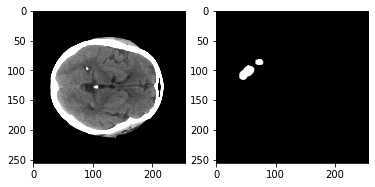

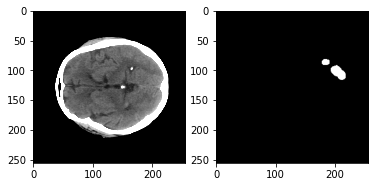

In [ ]:
# For testing
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow(CT_Train[12,:,:,0],cmap='gray', vmin=0, vmax=100)
plt.subplot(1,2,2)
plt.imshow(OT_Train[12,:,:,0],cmap='gray', vmin=0, vmax=1)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(CT_Train_mirror[12,:,:,0],cmap='gray', vmin=0, vmax=100)
plt.subplot(1,2,2)
plt.imshow(OT_Train_mirror[12,:,:,0],cmap='gray', vmin=0, vmax=1)

In [ ]:
# Save to CSV file
N_train = CT_Train.shape[0]
n_x = CT_Train.shape[1]
n_y = CT_Train.shape[2]
outputDict = {
    'NCCT_train': [], 'OT_train': [],
}

for i in range(N_train):
  print('processing '+str(i+1)+'th image')

  # CT
  ct_img = CT_Train[i, :, :, 0].reshape(n_x*n_y)
  outputDict['NCCT_train'].append(ct_img)
  ct_img_mirror = CT_Train_mirror[i, :, :, 0].reshape(n_x*n_y)
  outputDict['NCCT_train'].append(ct_img_mirror)

  # OT
  ot_img = OT_Train[i, :, :, 0].reshape(n_x*n_y)
  outputDict['OT_train'].append(ot_img)
  ot_img_mirror = OT_Train_mirror[i, :, :, 0].reshape(n_x*n_y)
  outputDict['OT_train'].append(ot_img_mirror)

In [ ]:
for key in outputDict:
  np.savetxt(os.path.join(save_path, str(key)+'_aug_rot_mir.csv'), outputDict[key], fmt='%d', delimiter=',')

In [ ]:
df = pd.read_csv(os.path.join(save_path, 'OT_train_aug_rot_mir.csv'), header=None)
OT_Train = df.to_numpy().reshape(438*4*2, 256, 256, 1)
df = pd.read_csv(os.path.join(save_path, 'NCCT_train_aug_rot_mir.csv'), header=None)
CT_Train = df.to_numpy().reshape(438*4*2, 256, 256, 1)

In [ ]:
# For testing
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow(CT_Train[24,:,:,0],cmap='gray', vmin=0, vmax=100)
plt.subplot(1,2,2)
plt.imshow(OT_Train[24,:,:,0],cmap='gray', vmin=0, vmax=1)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(CT_Train[25,:,:,0],cmap='gray', vmin=0, vmax=100)
plt.subplot(1,2,2)
plt.imshow(OT_Train[25,:,:,0],cmap='gray', vmin=0, vmax=1)